## 在 Python 中使用 GSVA

In [2]:
import pandas as pd
from GSVA import gsva, gmt_to_dataframe
# Some extras to look at the high dimensional data
from plotnine import *
from sklearn.manifold import TSNE

基因集数据

In [9]:
genesets_df = gmt_to_dataframe('data/c2.cp.v2024.1.Hs.symbols.gmt')
genesets_df.head()

,name,description,member
0,SA_B_CELL_RECEPTOR_COMPLEXES,https://www.gsea-msigdb.org/gsea/msigdb/human/...,ATF2
1,SA_B_CELL_RECEPTOR_COMPLEXES,https://www.gsea-msigdb.org/gsea/msigdb/human/...,BCR
2,SA_B_CELL_RECEPTOR_COMPLEXES,https://www.gsea-msigdb.org/gsea/msigdb/human/...,BLNK
3,SA_B_CELL_RECEPTOR_COMPLEXES,https://www.gsea-msigdb.org/gsea/msigdb/human/...,ELK1
4,SA_B_CELL_RECEPTOR_COMPLEXES,https://www.gsea-msigdb.org/gsea/msigdb/human/...,FOS


基因表达数据

In [7]:
expression_df = pd.read_csv('data/GeneExpression.2024-08-20.tsv', sep='\t')
expression_df.set_index(expression_df.columns[0], inplace=True)
expression_df = expression_df.T
expression_df.iloc[0:5,0:5]

Case,HCM-CSHL-0237-C18,HCM-BROD-0045-C16,HCM-BROD-0681-C71,TCGA-AC-A2QJ,TCGA-KK-A7AW
HOXA9,-0.618792,-0.280563,-0.864859,-0.856869,0.444827
HOXA13,-0.639590,-0.239286,-1.027402,-1.057190,-0.229254
HOXA11,-0.909869,-0.105077,-0.973333,-0.393977,0.464753
ZBTB16,-0.123269,-0.837142,-0.302443,-0.829570,-0.217166
MYH11,-0.426744,-0.654088,-0.649341,-0.653643,-0.243789


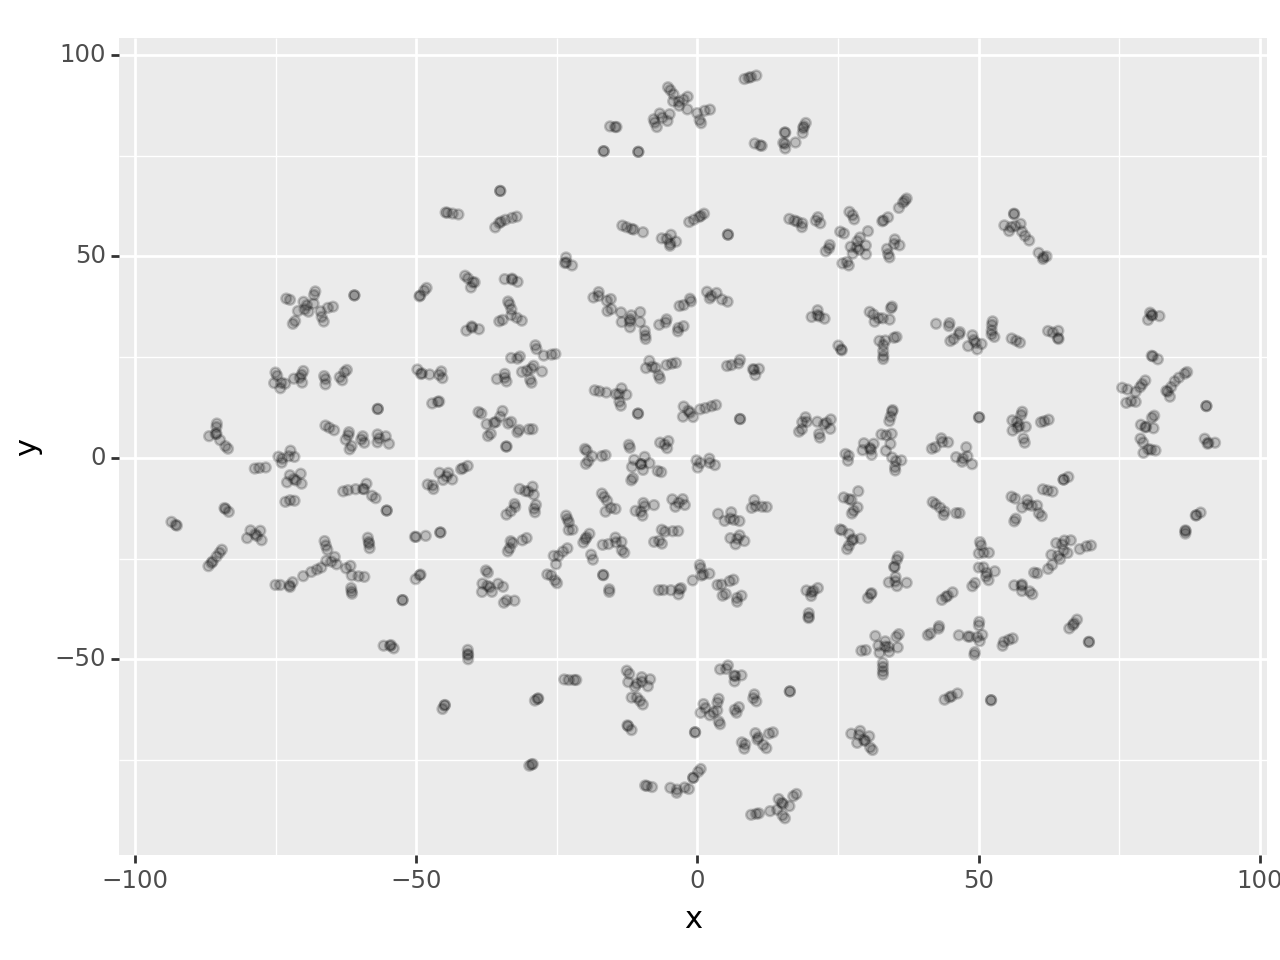

<Figure Size: (640 x 480)>

In [8]:
XV = TSNE(n_components=2, perplexity=2).fit_transform(expression_df.T)
df = pd.DataFrame(XV).rename(columns={0: 'x', 1: 'y'})

(ggplot(df, aes(x='x', y='y')) + geom_point(alpha=0.2))

**GSVA**

In [12]:
pathways_df = gsva(expression_df, genesets_df)
pathways_df.iloc[0:5,0:5]

,HCM-CSHL-0237-C18,HCM-BROD-0045-C16,HCM-BROD-0681-C71,TCGA-AC-A2QJ,TCGA-KK-A7AW
name,,,,,
BIOCARTA_41BB_PATHWAY,0.232323,0.232323,0.090909,0.454545,-0.959596
BIOCARTA_AGR_PATHWAY,0.295918,0.759184,0.909091,0.167730,-0.783745
BIOCARTA_ARENRF2_PATHWAY,0.232323,0.232323,0.090909,0.454545,-0.959596
BIOCARTA_ARF_PATHWAY,0.333333,0.737374,-0.959596,0.696970,0.030303
BIOCARTA_AT1R_PATHWAY,0.295918,0.759184,0.909091,0.167730,-0.783745


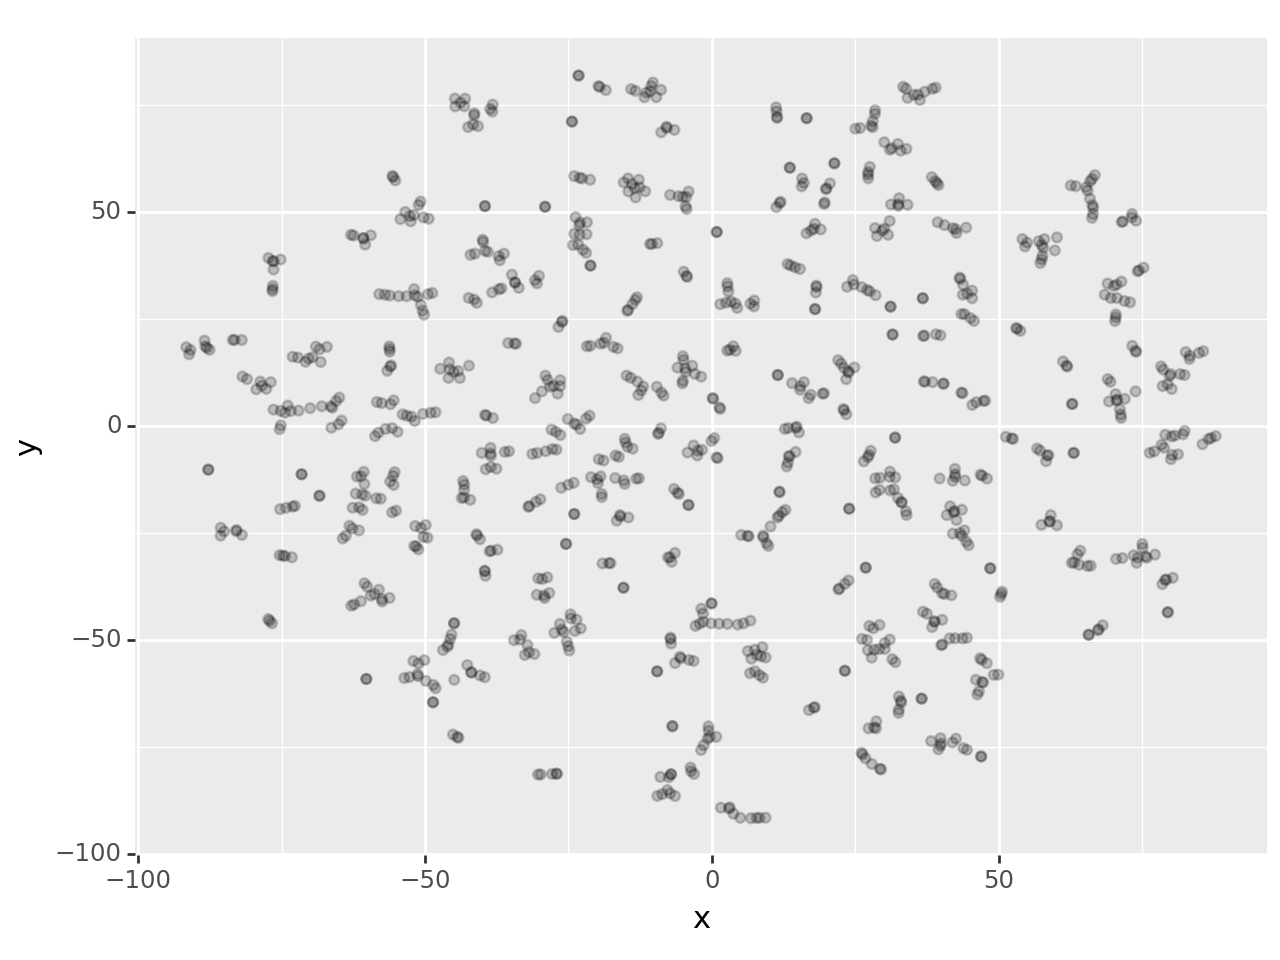

<Figure Size: (640 x 480)>

In [13]:
YV = TSNE(n_components=2, perplexity=2).fit_transform(pathways_df.T)
pf = pd.DataFrame(YV).rename(columns={0: 'x', 1: 'y'})

(ggplot(pf, aes(x='x', y='y')) + geom_point(alpha=0.2))